In [6]:
import pandas as pd
import math
import numpy as np
import pylab
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.stats import chisquare
import scipy

SN = 3000 / 10000

Power_divergenceResult(statistic=0.021638089987647484, pvalue=1.0)
Power_divergenceResult(statistic=-0.12003920986110596, pvalue=1.0)
dispersion_x = 0.047582287965979096
dispersion_x1 = 0.06921424043692972
k = 0.9468998460490845
k_new = 0.9796038755841181
k1 = 1.0554298453912985
dB/dI = 3.3372161524006385 мТл/A


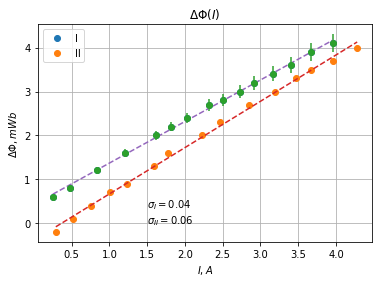

<Figure size 432x288 with 0 Axes>

In [24]:

def func(arr, k, b):
    return k * arr + b



x = np.array([0.25, 0.48, 0.84, 1.20, 1.62, 1.82, 2.03, 2.32, 2.51, 2.73, 2.91, 3.17, 3.40, 3.67, 3.96], dtype=np.float64)
y = np.array([3.1, 3.3, 3.7, 4.1, 4.5, 4.7, 4.9, 5.2, 5.3, 5.5, 5.7, 5.9, 6.1, 6.4, 6.6],dtype=np.float64)
y -= 2.5

x1 = np.array([0.29, 0.52, 0.76, 1.01, 1.23, 1.59, 1.78, 2.22, 2.47, 2.85, 3.19, 3.47, 3.67, 3.96, 4.28],dtype=np.float64)
y1 = np.array([6.6, 6.3, 6.0, 5.7, 5.5, 5.1, 4.8, 4.4, 4.1, 3.7, 3.4, 3.1, 2.9, 2.7, 2.4],dtype=np.float64)
y1 = 6.4 - y1


plt.plot(x, y, 'o', label='I')
plt.title(r'$\Delta \Phi(I)$')
plt.xlabel(r'$I, A$')
plt.ylabel(r'$\Delta \Phi, mWb$')
plt.plot(x1, y1, 'o', label = 'II')
plt.errorbar(x, y, xerr=0, yerr=0.05 * y, fmt='o')



popt1, pcov1 = curve_fit(func, x1, y1) 
plt.plot(x1, func(x1, *popt1), '--')

popt, pcov = curve_fit(func, x, y) 
plt.plot(x, func(x, *popt), '--')

plt.grid()
pylab.legend(loc='upper left')
plt.savefig('plot2.png', dpi=600) #Сохраняем график в файл


obs_vals = scipy.array(y)
exp_vals = scipy.array(func(x, *popt))
print(chisquare(obs_vals, f_exp=exp_vals))

obs_vals1 = scipy.array(y1)
exp_vals1 = scipy.array(func(x1, *popt1))
print(chisquare(obs_vals1, f_exp=exp_vals1))

dispersion = 0

for i in range(len(y)):
    dispersion += (func(x[i], *popt) - y[i]) ** 2
dispersion /= len(y)
dispersion = np.sqrt(dispersion)
print('dispersion_x = ' + str(dispersion))

dispersion1 = 0

for i in range(len(y1)):
    dispersion1 += (func(x1[i], *popt1) - y1[i]) ** 2
dispersion1 /= len(y1)
dispersion1 = np.sqrt(dispersion1)
print('dispersion_x1 = ' + str(dispersion1))

popt_chi, pcov_chi = curve_fit(func, x, y, sigma=0.05*y, absolute_sigma=True) 

print('k = ' + str(popt[0]))
print('k_new = ' + str(popt_chi[0]))
print('k1 = ' + str(popt1[0]))

plt.text(1.5, 0, r'$\sigma_I = $' + str(int(dispersion*100)/100) + '\n' + r'$\sigma_{II} = $' + str(int(dispersion1*100)/100))


dB_dI = (popt[0] / SN) 
dB_dI1 = (popt1[0] / SN)

print('dB/dI = ' + str((dB_dI + dB_dI1)/2) + ' мТл/A')


plt.savefig('plotPhi.png', dpi=300) #Сохраняем график в файл

plt.draw()



plt.show()
plt.draw()

dB/dn 2 = 2.091957782392954
dB/dn 1 = 2.0852833500881376
disp2 = 0.14659170897925483
disp1 = 0.11509882936873866


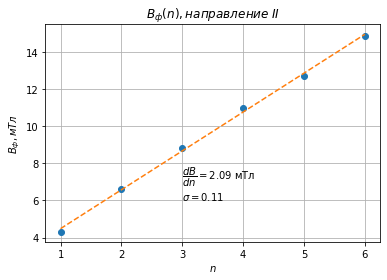

In [17]:
I2 = np.array([1.29, 1.98, 2.64, 3.29, 3.81, 4.45])
n = np.array([1, 2, 3, 4, 5, 6])
I1 = np.array([1.33, 2.01, 2.69, 3.24, 3.85, 4.49])

I2 *= (dB_dI + dB_dI1)/2
I1 *= (dB_dI + dB_dI1)/2

plt.plot(n, I2, 'o', label='II')
#plt.plot(n, I1, 'o', label='I')
plt.title(r'$B_ф(n), направление \; II$')
plt.xlabel(r'$n$')
plt.ylabel(r'$B_ф, мТл$')
plt.grid()


popt3, pcov3 = curve_fit(func, n, I2) 
plt.plot(n, func(n, *popt3), '--')

popt4, pcov4 = curve_fit(func, n, I1) 
#plt.plot(n2, func(n, *popt4), '--')

print('dB/dn 2 = ' + str(popt3[0]))
print('dB/dn 1 = ' + str(popt4[0]))

dispersion = 0
for i in range(len(n)):
    dispersion += (I2[i] - func(n[i], *popt3)) ** 2
dispersion /= len(n)
dispersion = np.sqrt(dispersion)
print('disp2 = ' + str(dispersion))

dispersion = 0
for i in range(len(n)):
    dispersion += (I1[i] - func(n[i], *popt4)) ** 2
dispersion /= len(n)
dispersion = np.sqrt(dispersion)
print('disp1 = ' + str(dispersion))

plt.text(3, 6, r'$\dfrac{dB}{dn} = $' + str(int(popt3[0]*100) / 100) +' мТл\n'+r'$\sigma = $' + str(int(dispersion * 100)/100))
plt.savefig('plotB2.png', dpi=300) #Сохраняем график в файл

plt.draw()

In [ ]:
plt.plot(n, I1, 'o', label='I')
plt.title(r'$B_ф(n), направление \; I$')
plt.xlabel(r'$n$')
plt.ylabel(r'$B_ф, мТл$')
plt.grid()

plt.plot(n, func(n, *popt4), '--')

plt.text(3, 6, r'$\dfrac{dB}{dn} = $' + str(int(popt4[0]*100) / 100) +' мТл\n'+r'$\sigma = $' + str(int(dispersion * 100)/100))
plt.savefig('plotB1.png', dpi=300) #Сохраняем график в файл

plt.draw()

I_crit = 122.0


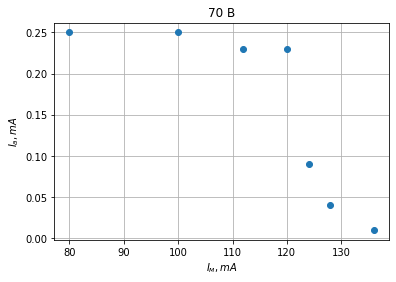

In [9]:
Ia = np.array([25, 25, 23, 23, 9, 4, 1], dtype='float64')
Im = np.array([20, 25, 28, 30, 31, 32, 34], dtype='float64')

K = 3.5e-5

Im *= 4.0
Ia *= 0.01

plt.plot(Im, Ia, 'o')
plt.xlabel(r'$I_м, mA$')
plt.ylabel(r'$I_a, mA$')
plt.title('70 B')
plt.grid()

print('I_crit = ' + str(Im[3] / 2 + Im[4] / 2))

plt.savefig('plot70.png', dpi=300) #Сохраняем график в файл

plt.draw()

I_crit = 136.0


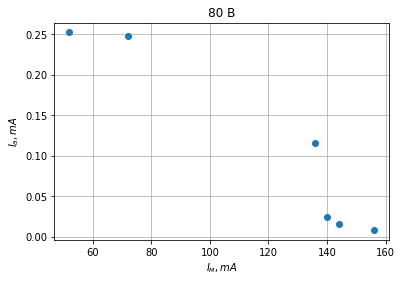

In [10]:
Ia = np.array([63, 62, 29, 6, 4, 2], dtype='float64')
Im = np.array([13, 18, 34, 35, 36, 39], dtype='float64')

Im *= 4.0
Ia *= 0.004

plt.plot(Im, Ia, 'o')
plt.xlabel(r'$I_м, mA$')
plt.ylabel(r'$I_a, mA$')
plt.title('80 B')
plt.grid()

print('I_crit = ' + str(Im[2]))

plt.savefig('plot80.png', dpi=300) #Сохраняем график в файл

plt.draw()

I_crit = 144.0


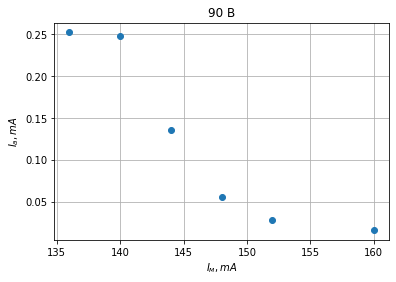

In [11]:
Ia = np.array([63, 62, 34, 14, 7, 4], dtype='float64')
Im = np.array([34, 35, 36, 37, 38, 40], dtype='float64')

Im *= 4.0
Ia *= 0.004

plt.plot(Im, Ia, 'o')
plt.xlabel(r'$I_м, mA$')
plt.ylabel(r'$I_a, mA$')
plt.title('90 B')
plt.grid()

print('I_crit = ' + str(Im[1] / 2 + Im[3] / 2))

plt.savefig('plot90.png', dpi=300) #Сохраняем график в файл

plt.draw()

I_crit = 152.0


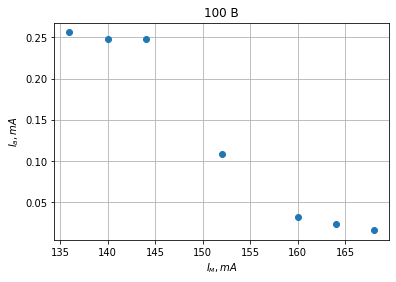

In [12]:
Ia = np.array([64, 62, 62, 27, 8, 6, 4], dtype='float64')
Im = np.array([34, 35, 36, 38, 40, 41, 42], dtype='float64')

Im *= 4.0
Ia *= 0.004

plt.plot(Im, Ia, 'o')
plt.xlabel(r'$I_м, mA$')
plt.ylabel(r'$I_a, mA$')
plt.title('100 B')
plt.grid()

print('I_crit = ' + str(Im[2] / 2 + Im[4] / 2))

plt.savefig('plot100.png', dpi=300) #Сохраняем график в файл

plt.draw()

I_crit = 160.0


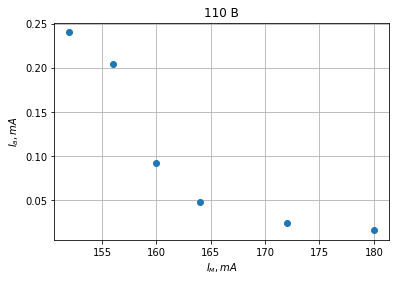

In [13]:
Ia = np.array([60, 51, 23, 12, 6, 4], dtype='float64')
Im = np.array([38, 39, 40, 41, 43, 45], dtype='float64')

Im *= 4.0
Ia *= 0.004

plt.plot(Im, Ia, 'o')
plt.xlabel(r'$I_м, mA$')
plt.ylabel(r'$I_a, mA$')
plt.title('110 B')
plt.grid()

print('I_crit = ' + str(Im[1] / 2 + Im[3] / 2))

plt.savefig('plot110.png', dpi=300) #Сохраняем график в файл

plt.draw()

BB/V = 3.189900008692729e-07
9.275636581927966e-07


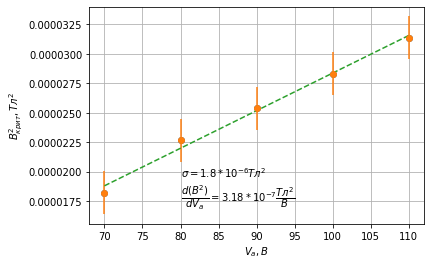

In [14]:
B_crit2 = np.array([122**2, 136**2, 144**2, 152**2, 160**2], dtype='float64')

B_crit2 *= K**2
V_a = np.array([70, 80, 90, 100, 110], dtype='float64')

plt.plot(V_a, B_crit2, 'o')
plt.xlabel(r'$V_a,  В$')
plt.ylabel(r'$B_{крит}^2, Тл^2$')
plt.grid()
plt.errorbar(V_a, B_crit2, xerr=0, yerr=0.1*B_crit2[0], fmt='o')

popt, pcov = curve_fit(func, V_a, B_crit2)
plt.plot(V_a, func(V_a, *popt), '--')


print('BB/V = ' + str(popt[0]))

dispersion = 0.0

for i in range(len(V_a)):
    dispersion += (B_crit2[i] - func(V_a[i], *popt))**2
dispersion = np.sqrt(dispersion)
print(dispersion)

plt.text(80, 0.0000175, r'$\sigma = 1.8*10^{-6} Тл^2$' + '\n' + r'$\dfrac{d(B^2)}{dV_a} = 3.18*10^{-7} \dfrac{Тл^2}{B}$')

plt.savefig('plotBB_V.png', dpi=300) #Сохраняем график в файл

plt.draw()